# Model Training

### 1.1 Import Data and Required Packages

In [2]:
# Basic import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling 

# importing algorithms
from sklearn.linear_model import LinearRegression , Lasso ,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Ensemble methods 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV



# Data Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, PolynomialFeatures

# model tuning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# Model Saving
from joblib import dump, load

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


#### Import CSV Data as Data Frame


In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and y variables

In [5]:
X = df.drop(columns = ['math_score'],axis = 1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
cat_features = X.select_dtypes(include = 'object').columns.tolist()
for feature in cat_features:
    print(f"Categories in {feature} variable    : " ,end = " ")
    print(df[feature].unique())

Categories in gender variable    :  ['female' 'male']
Categories in race_ethnicity variable    :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable    :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable    :  ['standard' 'free/reduced']
Categories in test_preparation_course variable    :  ['none' 'completed']


In [7]:
y = df['math_score']

In [8]:
## Create columns transform with 3 types of transformers

num_featurres = X.select_dtypes(include = ['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include = 'object').columns.tolist()

numaric_transform = StandardScaler()
categorical_transform = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numaric_transform, num_featurres),
        ('cat', categorical_transform, cat_features)
    ]
)

In [9]:
cat_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [12]:
# separate the data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

### Create and Evaluate Function to give the metrics after training model

In [13]:
# create the fucntion to evaluate the model 
def evaluate_model(true , pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)
    
    return mae, mse, rmse, r2
    
 

In [14]:
models = {
    'Lasso Regression': Lasso(),
    'Linear Regression': LinearRegression(),
    
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    'CatBoost Regressor': CatBoostRegressor(verbose=0),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Support Vector Regressor': SVR(),
    'Ridge Regression': Ridge()
}
model_list = []
r2_list = []

for model_name,model in models.items():
    # train the model
    model.fit(X_train,y_train)
    
    
    # make predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate the model 
    model_train_mae, model_train_mse , model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_mse , model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print("Model name : ",model_name)
    model_list.append(model_name)
    print("Model performance for training set")
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('--------------------------------------------------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    

Model name :  Lasso Regression
Model performance for training set
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
--------------------------------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Model name :  Linear Regression
Model performance for training set
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
--------------------------------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Model name :  Decision Tree Regressor
Model performance for training set
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------------------------------

  File "c:\VSCode\Udemy_ML_KN_20-03-25\27MLprojects\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\VSCode\Udemy_ML_KN_20-03-25\27MLprojects\venv\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\VSCode\Udemy_ML_KN_20-03-25\27MLprojects\venv\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\VSCode\Udemy_ML_KN_20-03-25\27MLprojects\venv\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


Model name :  K-Neighbors Regressor
Model performance for training set
Model performance for Training set
- Root Mean Squared Error: 5.7128
- Mean Absolute Error: 4.5168
- R2 Score: 0.8552
--------------------------------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2538
- Mean Absolute Error: 5.6190
- R2 Score: 0.7838


Model name :  XGBoost Regressor
Model performance for training set
Model performance for Training set
- Root Mean Squared Error: 1.0073
- Mean Absolute Error: 0.6875
- R2 Score: 0.9955
--------------------------------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5958
- Mean Absolute Error: 5.1036
- R2 Score: 0.8212


Model name :  CatBoost Regressor
Model performance for training set
Model performance for Training set
- Root Mean Squared Error: 3.0427
- Mean Absolute Error: 2.4054
- R2 Score: 0.9589
----------------------------------------------------------

#### Results 

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
10,Ridge Regression,0.880593
1,Linear Regression,0.880433
7,Gradient Boosting Regressor,0.872041
5,CatBoost Regressor,0.851632
6,Random Forest Regressor,0.851038
8,AdaBoost Regressor,0.844866
0,Lasso Regression,0.825320
4,XGBoost Regressor,0.821220
3,K-Neighbors Regressor,0.783770
2,Decision Tree Regressor,0.728999


#### Linear Regression

In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


## Plot y_pred and y_test

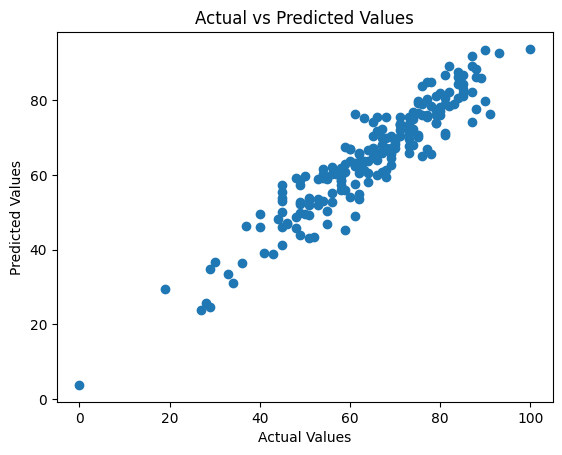

In [17]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<Axes: xlabel='math_score'>

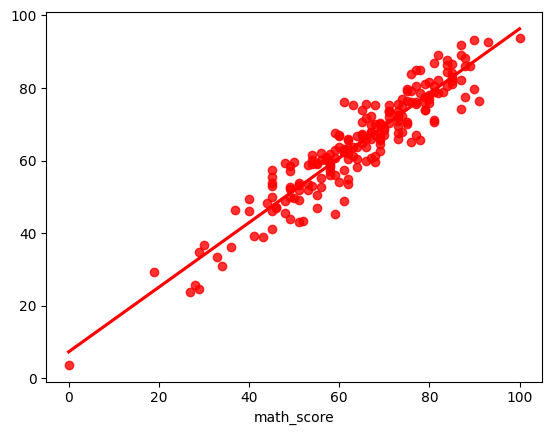

In [18]:
sns.regplot(x=y_test,y=y_pred,ci = None,color ='red')

### Difference between actual  and predicted values 


In [19]:
pred_df = pd.DataFrame({"actual" : y_test,"predicted" : y_pred,"Difference" : y_test-y_pred})
pred_df.head()

,actual,predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
